Project  Name - big mart sales predition

project type -supervies ml

Contribution - IndividuaL

Team Member 1 - jayshri dattatry gangad

**prject sammary**

The Big Mart Sale Prediction project aims to build a predictive model that can forecast the sales of various products in the retail stores of Big Mart, a leading supermarket chain. The project utilizes machine learning algorithms to analyze historical sales data and relevant features to predict future sales, helping the company optimize inventory management, plan promotions, and improve overall business efficiency.

**GitHub Link -**


https://github.com/Gangadrani/Big-Mart-Sales_Project.git

**Features Description**

**Variable  Description**


1] Item_Identifier	Unique product ID


2]Item_Weight	 Weight of product


3]Item_Fat_Content \Whether the product is low fat or not


4]Item_Visibility	The % of total display area of all products in a store allocated to the particular product


5]Item_Type	The category to which the product belongs


6]Item_MRP	Maximum Retail Price (list price) of the product


7]Outlet_Identifier	Unique store ID


8]Outlet_Establishment_Year	The year in which store was established


9]utlet_Size	The size of the store in terms of ground area covered


10]Outlet_Location_Type	The type of city in which the store is located



11]Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket


12]Item_Outlet_Sales	Sales of the product in the particulat store. This is the outcome variable to be predicted.

**importing  Dependdencies**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [5]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data collection & Analysis**

**loading  the dataset**

In [6]:
#loading  the dataset from  csv file to a pandas DataFrame
big_mart_data=pd.read_csv('/content/Train (4).csv')

In [7]:
#first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
big_mart_data['Outlet_Size']=big_mart_data['Outlet_Size'].astype('object')

In [10]:
big_mart_data['Outlet_Size'].fillna('medium',inplace=True)

In [11]:
big_mart_data.head(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# number of data point & number of features
big_mart_data.shape

(8523, 12)

In [13]:
# geting some informations about the dataset
big_mart_data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical Features:

Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size

Outlet_Location_Type

Outlet_Type



**Numerical feature**

Item_weight

Item_visibility

Item_Mrp

Item_outlet_sale

Outlet_Estimblishment



In [14]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling Missing Values**

Mean  -->average value   







Mode -->Most repeated value









In [15]:
#mean value of "Item_weight"column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [16]:
#filling the missing values in "Item_weight"column with "mean"value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace =True)

In [17]:
#checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
big_mart_data = pd.DataFrame(big_mart_data)

Replacing the missing values in "Outlet_size" with mode

In [19]:
big_mart_data['Outlet_Size'].unique()

array(['Medium', 'medium', 'High', 'Small'], dtype=object)

In [20]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [21]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [22]:
big_mart_data.loc[missing_values,'Outlet_Size']=big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [23]:
#cheking missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
big_mart_data['Outlet_Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Medium
1       Medium
2       Medium
3       medium
4         High
         ...  
8518      High
8519    medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

Data Analysis

In [25]:
#statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical Features**

In [26]:
sns.set()

<Figure size 600x600 with 0 Axes>

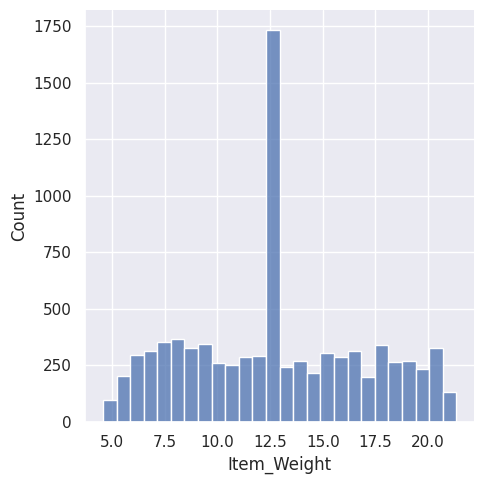

In [27]:
#Item_weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

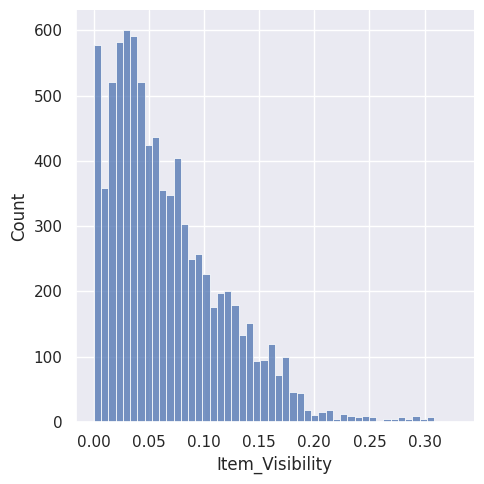

In [28]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

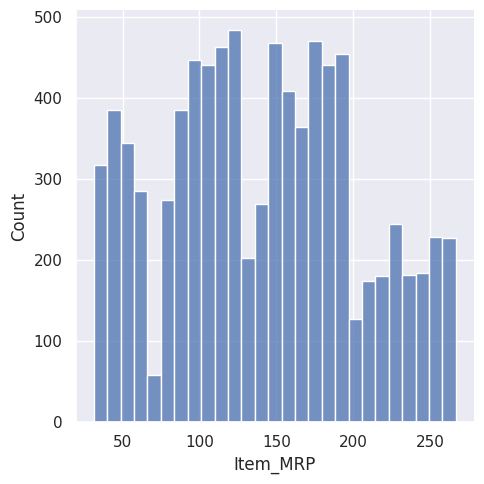

In [29]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

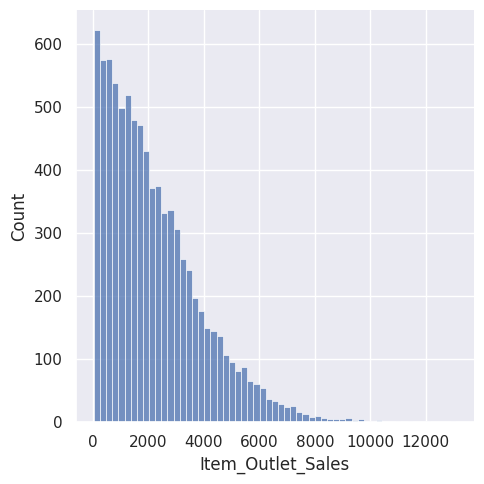

In [30]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

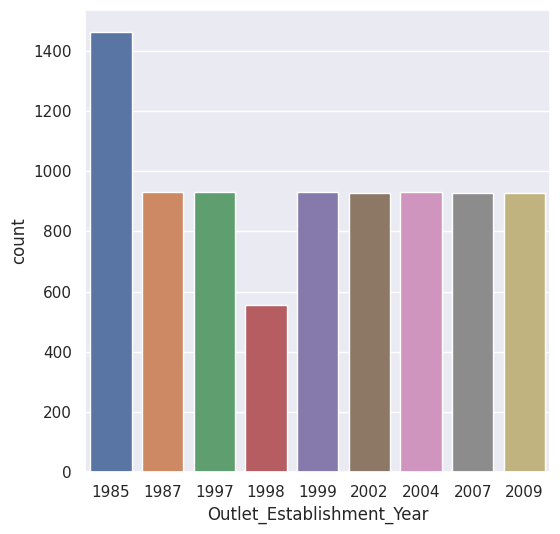

In [31]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

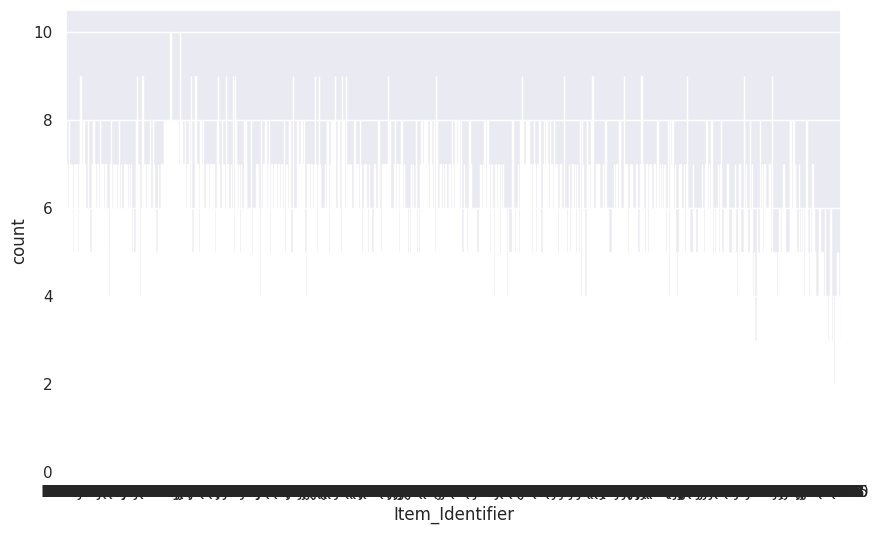

In [32]:
# Item_Identifier column
plt.figure(figsize=(10,6))
sns.countplot(x='Item_Identifier',data=big_mart_data)
plt.show()

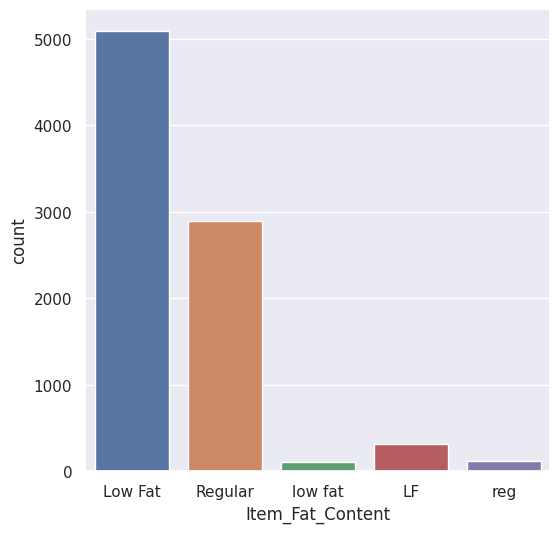

In [33]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

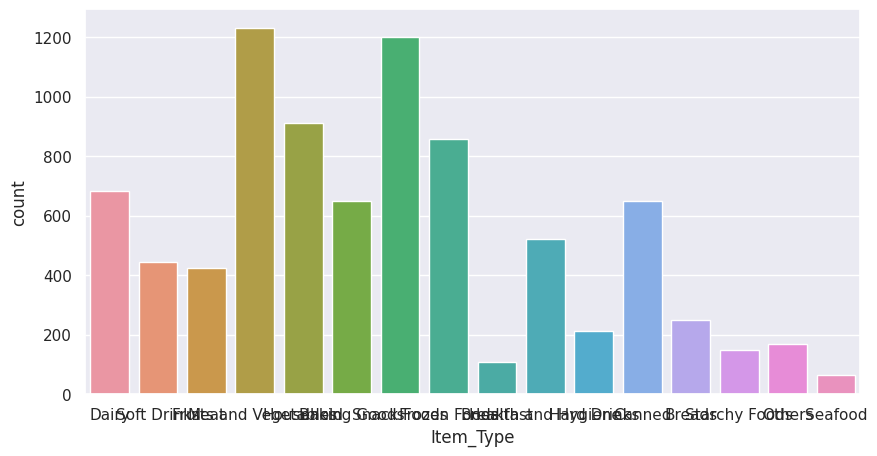

In [34]:
# Item_Type colUmn
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

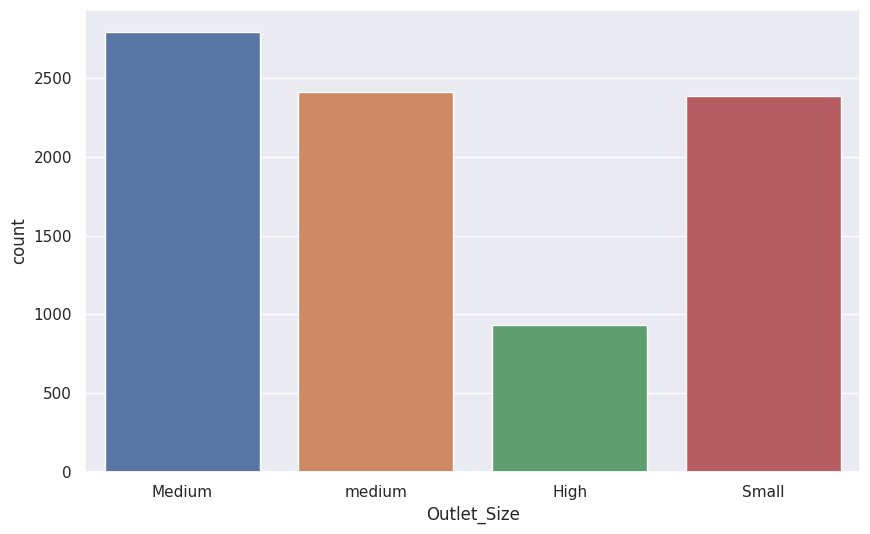

In [35]:
# outlet_size colUmn
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

In [36]:
# Create a sample data dictionary
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [37]:
# Create the DataFrame
datafrem = pd.DataFrame(big_mart_data)

In [38]:
# Display the DataFrame
print(datafrem)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

data preprocessing

In [39]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
big_mart_data.replace({'Item_Fat_Content':{'Low_Fat':'Low_Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

Label Encoding

In [42]:
encoder = LabelEncoder()

In [43]:
big_mart_data['Item_Identifier']= encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']= encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']= encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Location_Type']= encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']= encoder.fit_transform(big_mart_data['Outlet_Type'])

In [44]:
big_mart_data = pd.get_dummies(big_mart_data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type'])
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,156,9.30,0.016047,249.8092,9,1999,3735.1380,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,5.92,0.019278,48.2692,3,2009,443.4228,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,662,17.50,0.016760,141.6180,9,1999,2097.2700,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1121,19.20,0.000000,182.0950,0,1998,732.3800,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,8.93,0.000000,53.8614,1,1987,994.7052,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Spliting Features and Target

In [45]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']


In [46]:
print(X)

      Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0                 156        9.300         0.016047  249.8092   
1                   8        5.920         0.019278   48.2692   
2                 662       17.500         0.016760  141.6180   
3                1121       19.200         0.000000  182.0950   
4                1297        8.930         0.000000   53.8614   
...               ...          ...              ...       ...   
8518              370        6.865         0.056783  214.5218   
8519              897        8.380         0.046982  108.1570   
8520             1357       10.600         0.035186   85.1224   
8521              681        7.210         0.145221  103.1332   
8522               50       14.800         0.044878   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Item_Fat_Content_0  \
0                     9                       1999                   1   
1                     3                       2009                   0 

In [47]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training data &Testing data

In [48]:
X_train ,X_test , Y_train ,Y_test =train_test_split(X,Y,test_size =0.2,random_state=42)

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 36) (6818, 36) (1705, 36)


Machine Learning Model Training


XG Boost Regressr

In [50]:
regressor=XGBRegressor()

In [51]:
print(datafrem.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [52]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [53]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**EVALUATION**

In [55]:
training_data_predition = regressor.predict(X_train)

In [56]:
r2_train =metrics.r2_score(Y_train,training_data_predition)

In [57]:
print('R- Squared value=',r2_train)

R- Squared value= 0.8798345398059317


In [58]:
test_data_predition =regressor.predict(X_test)

In [59]:
r2_test =metrics.r2_score(Y_test,test_data_predition)

In [60]:
print('R-Squared value=' ,r2_test)

R-Squared value= 0.5094797925538894
